<a href="https://colab.research.google.com/github/chaubeyarvind/DataAnalytics-NumPY/blob/main/ElandLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install elasticsearch==8.4..2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install eland

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# NEW SAMPLE 2022, OCT 3

In [ ]:
import eland as ed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from elasticsearch import Elasticsearch

# Import standard test settings for consistent results
from eland.conftest import *

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
es = Elasticsearch(
   cloud_id="XXXXX" ,
   basic_auth=("Demouser","Demouser@21"),
)


In [ ]:
df = ed.DataFrame(es, es_index_pattern="kibana_sample_data_ecommerce")
df = ed.eland_to_pandas(df)

In [ ]:
df.count()

category                 4675
currency                 4675
customer_birth_date         0
customer_first_name      4675
customer_full_name       4675
                         ... 
taxless_total_price      4675
total_quantity           4675
total_unique_products    4675
type                     4675
user                     4675
Length: 46, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4675 entries, z3FfoIMBL4CtHtXbfjvv to lalfoIMBWrjaPPidiEd1
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   category                       4675 non-null   object             
 1   currency                       4675 non-null   object             
 2   customer_birth_date            0 non-null      datetime64[ns]     
 3   customer_first_name            4675 non-null   object             
 4   customer_full_name             4675 non-null   object             
 5   customer_gender                4675 non-null   object             
 6   customer_id                    4675 non-null   int64              
 7   customer_last_name             4675 non-null   object             
 8   customer_phone                 4675 non-null   object             
 9   day_of_week                    4675 non-null   object             

In [ ]:
df.customer_full_name.unique()

array(['Eddie Underwood', 'Mary Bailey', 'Gwen Butler', ..., 'Sonya Tran',
       'Recip Butler', 'Jim Gilbert'], dtype=object)

In [ ]:
df.customer_full_name.unique

<bound method Series.unique of z3FfoIMBL4CtHtXbfjvv    Eddie Underwood
0HFfoIMBL4CtHtXbfjvv        Mary Bailey
0XFfoIMBL4CtHtXbfjvv        Gwen Butler
0nFfoIMBL4CtHtXbfjvv     Diane Chandler
03FfoIMBL4CtHtXbfjvv        Eddie Weber
                             ...       
kalfoIMBWrjaPPidiEd1       Mary Lambert
kqlfoIMBWrjaPPidiEd1        Jim Gilbert
k6lfoIMBWrjaPPidiEd1       Yahya Rivera
lKlfoIMBWrjaPPidiEd1       Mary Hampton
lalfoIMBWrjaPPidiEd1    Jackson Hopkins
Name: customer_full_name, Length: 4675, dtype: object>

In [ ]:
df.head(3)

,category,currency,...,type,user
z3FfoIMBL4CtHtXbfjvv,[Men's Clothing],EUR,...,order,eddie
0HFfoIMBL4CtHtXbfjvv,[Women's Clothing],EUR,...,order,mary
0XFfoIMBL4CtHtXbfjvv,"[Women's Shoes, Women's Clothing]",EUR,...,order,gwen


In [ ]:
#Convert back to dataframe to initiate query

In [ ]:
df = ed.DataFrame(es, es_index_pattern="kibana_sample_data_ecommerce")

In [ ]:
# defining the full-text query we need: Retrieving records for either Elitelligence or Primemaster manufacturer
query = {
        "query_string" : {
            "fields" : ["manufacturer"],
            "query" : "Elitelligence OR Primemaster"
        }
    }
# using full-text search capabilities with Eland:
text_search_df = df.es_query(query)

# visualizing price of products for each manufacturer using pandas column syntax:
text_search_df[['manufacturer','products.price']]

,manufacturer,products.price
z3FfoIMBL4CtHtXbfjvv,"[Elitelligence, Oceanavigations]","[11.99, 24.99]"
0nFfoIMBL4CtHtXbfjvv,"[Primemaster, Oceanavigations]","[74.99, 99.99]"
03FfoIMBL4CtHtXbfjvv,[Elitelligence],"[59.99, 20.99]"
1XFfoIMBL4CtHtXbfjvv,"[Low Tide Media, Elitelligence]","[20.99, 24.99]"
1nFfoIMBL4CtHtXbfjvv,"[Low Tide Media, Oceanavigations, Elitelligence]","[28.99, 41.99, 59.99, 7.99]"
...,...,...
galfoIMBWrjaPPidiEd1,[Elitelligence],"[59.99, 18.99]"
hKlfoIMBWrjaPPidiEd1,"[Low Tide Media, Elitelligence]","[24.99, 41.99]"
iKlfoIMBWrjaPPidiEd1,[Elitelligence],"[24.99, 25.99]"
iqlfoIMBWrjaPPidiEd1,"[Angeldale, Elitelligence]","[79.99, 10.99]"


In [ ]:
# switch to pandas again

In [ ]:
df = ed.eland_to_pandas(df)

In [ ]:
all_features=df.columns
## Display uniques values for each feature 
print('Unique values in each features:')
print('(Feature, # of unique values)')
for feature in all_features:
    try:
        unique_values=df[feature].unique()
        print('------------------------------')
        print(feature, len(unique_values))
        print(unique_values)
    except:
        print("")

Unique values in each features:
(Feature, # of unique values)

------------------------------
currency 1
['EUR']
------------------------------
customer_birth_date 1
['NaT']
------------------------------
customer_first_name 46
['Eddie' 'Mary' 'Gwen' 'Diane' 'Oliver' 'Abd' 'Wilhemina St.' 'Rabbia Al'
 'Sultan Al' 'George' 'Boris' 'Yahya' 'Brigitte' 'Selena' 'rania' 'Muniz'
 'Sonya' 'Robbie' 'Kamal' 'Recip' 'Elyssa' 'Pia' 'Betty' 'Frances'
 'Yasmine' 'Mostafa' 'Jackson' 'Stephanie' 'Jim' 'Tariq' 'Fitzgerald'
 'Abdulraheem Al' 'Samir' 'Jason' 'Abigail' 'Wagdi' 'Phil' 'Yuri'
 'Clarice' 'Ahmed Al' 'Hicham' 'Robert' 'Irwin' 'Youssef' 'Thad' 'Marwan']
------------------------------
customer_full_name 3321
['Eddie Underwood' 'Mary Bailey' 'Gwen Butler' ... 'Sonya Tran'
 'Recip Butler' 'Jim Gilbert']
------------------------------
customer_gender 2
['MALE' 'FEMALE']
------------------------------
customer_id 46
[38 20 26 22  7 52 17  5 19 32 36 23 12 42 24 37 28 48 39 10 27 45 44 49
 43  9 13 

In [ ]:
## Filter variables with null/nan values based on percentage
# This gives you the percentage of missing values in each of the columns. 
# Knowing the percentage can be useful in determining whether you should drop the column.
# The percentage is calculated using the mean
def perc_missing(df):
    '''prints out columns with missing values with its %'''
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
perc_missing(df)

customer_birth_date => 100.0%
geoip.city_name => 12.43%
geoip.region_name => 16.06%


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'eddie'),
 Text(0, 0, 'mary'),
 Text(0, 0, 'gwen'),
 Text(0, 0, 'diane'),
 Text(0, 0, 'oliver'),
 Text(0, 0, 'abd'),
 Text(0, 0, 'wilhemina'),
 Text(0, 0, 'rabbia'),
 Text(0, 0, 'sultan'),
 Text(0, 0, 'george'),
 Text(0, 0, 'boris'),
 Text(0, 0, 'yahya'),
 Text(0, 0, 'brigitte'),
 Text(0, 0, 'selena'),
 Text(0, 0, 'rani'),
 Text(0, 0, 'muniz'),
 Text(0, 0, 'sonya'),
 Text(0, 0, 'robbie'),
 Text(0, 0, 'kamal'),
 Text(0, 0, 'recip'),
 Text(0, 0, 'elyssa'),
 Text(0, 0, 'pia'),
 Text(0, 0, 'betty'),
 Text(0, 0, 'frances'),
 Text(0, 0, 'yasmine'),
 Text(0, 0, 'mostafa'),
 Text(0, 0, 'jackson'),
 Text(0, 0, 'stephanie'),
 Text(0, 0, 'jim'),
 Text(0, 0, 'tariq'),
 Text(0, 0, 'fuzzy'),
 Text(0, 0, 'abdulraheem'),
 Text(0, 0, 'samir'),
 Text(0, 0, 'jason'),
 Text(0, 0, 'abigail'),
 Text(0, 0, 'wagdi'),
 Text(0, 0, 'phil'),
 Text(0, 0, 'yuri'),
 Text(0, 0, 'clarice'),
 Text(0, 0, 'ahmed'),
 Text(0, 0, 'hicham'),
 Text(0, 0, 'robert'),
 Text(0, 0, 'irwin'),
 Text(0, 0, 'youssef'),
 Te

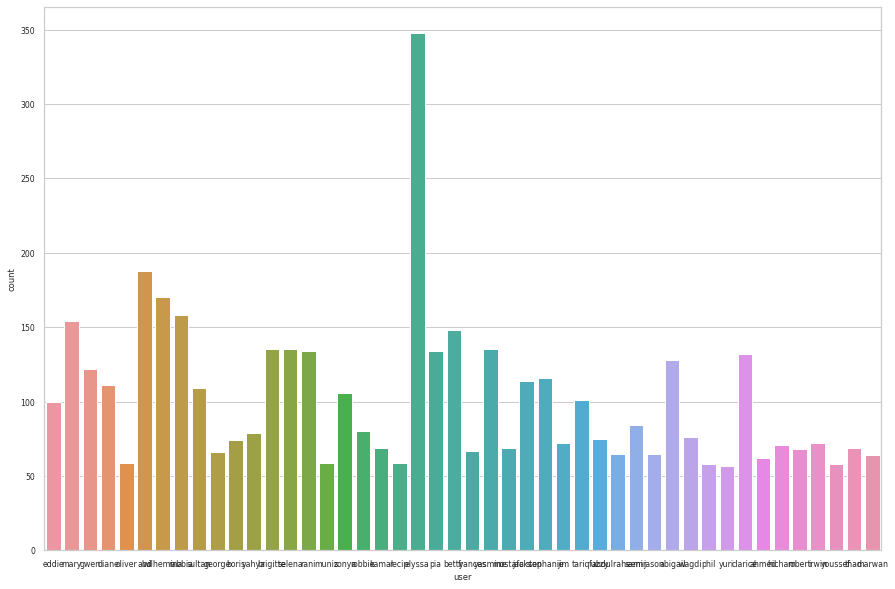

In [ ]:
## Vizualize frequencies/counts for different feature (userName)  
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

rcParams['figure.figsize']=15,10
sns.set(style='whitegrid', palette='muted', font_scale=0.7)
uname=df['user'].unique()
ax=sns.countplot(df.user)
ax.set_xticklabels(uname)

In [ ]:
## Device Activity Exploration 
# startTime and deviceName
df_aggr = df[['order_date', 'geoip.region_name']]
df_aggr.set_index('order_date', inplace=True, drop=True)
df_aggr.head(3)

,geoip.region_name
order_date,
2022-10-17 09:28:48+00:00,Cairo Governorate
2022-10-16 21:59:02+00:00,Dubai
2022-10-16 22:32:10+00:00,California


In [ ]:
# Transpose the data so we can get the value count of each region name a period of time.
df_aggr = df_aggr.pivot_table(index='order_date', columns='geoip.region_name', aggfunc='size', fill_value=0)
# Then resample the data to be in an an arbitrary interval
df_aggr = df_aggr.resample("60T").sum()

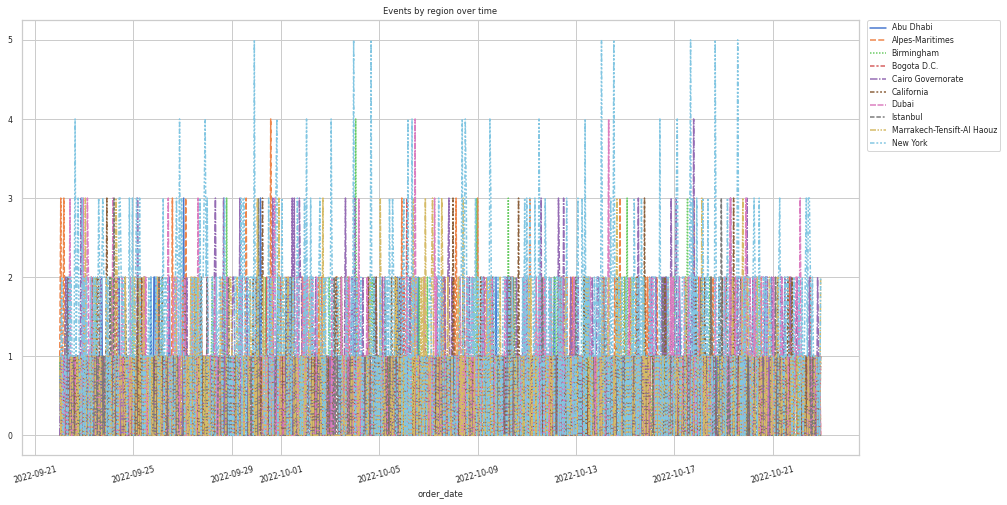

In [ ]:
# Finally let's plot our data
plt.figure(figsize=(15,8))
id_plot = sns.lineplot(data=df_aggr)
plt.xticks(rotation=15)
plt.title('Events by region over time')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0)


plt.show()